# EDA of my Zillow Median Rent Predictor.
---

## Zillow Data Directory
---

In [1]:
ZILLOW_DATA_ROOT_DIR = './zillow_data/'
CITY_MEDIAN_RENTAL_DATAFILE = 'City_MedianRentalPrice_AllHomes.csv'
FULL_MEDIAN_RENTAL_DATA_PATH = f'{ZILLOW_DATA_ROOT_DIR}{CITY_MEDIAN_RENTAL_DATAFILE}'

In [2]:
FULL_MEDIAN_RENTAL_DATA_PATH

'./zillow_data/City_MedianRentalPrice_AllHomes.csv'

## Loading Data into Dataframe
---

In [3]:
import pandas as pd

MedianRentalPrice_Dataframe = pd.read_csv(FULL_MEDIAN_RENTAL_DATA_PATH)

In [4]:
MedianRentalPrice_Dataframe

,Unnamed: 0,RegionName,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,0,New York,NY,New York-Newark-Jersey City,Queens County,1,NaN,NaN,NaN,NaN,...,2800.0,2875.0,2900.0,2895.0,2850.0,2925.0,2900.0,2900.0,2899.0,2900.0
1,1,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,NaN,NaN,NaN,NaN,...,3500.0,3500.0,3500.0,3520.0,3500.0,3600.0,3607.0,3665.0,3600.0,3550.0
2,2,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,3,NaN,NaN,NaN,NaN,...,1500.0,1544.0,1550.0,1550.0,1550.0,1550.0,1550.0,1500.0,1500.0,1500.0
3,3,Chicago,IL,Chicago-Naperville-Elgin,Cook County,4,NaN,1600.0,1500.0,1500.0,...,1775.0,1795.0,1800.0,1800.0,1800.0,1812.5,1800.0,1800.0,1766.0,1750.0
4,4,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,NaN,NaN,NaN,NaN,...,1300.0,1300.0,1325.0,1345.0,1349.0,1322.5,1299.0,1300.0,1299.0,1300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694,1694,Hillsboro Beach,FL,Miami-Fort Lauderdale-West Palm Beach,Broward County,1695,NaN,NaN,NaN,NaN,...,2700.0,2650.0,2737.5,2775.0,3000.0,3000.0,3150.0,3000.0,3150.0,3395.0
1695,1695,Amagansett,NY,New York-Newark-Jersey City,Suffolk County,1696,NaN,NaN,NaN,NaN,...,30000.0,33333.0,36000.0,36333.0,35000.0,30000.0,30000.0,34000.0,33041.5,35000.0
1696,1696,Quogue,NY,New York-Newark-Jersey City,Suffolk County,1697,NaN,NaN,NaN,NaN,...,30000.0,30000.0,30000.0,30000.0,30000.0,29500.0,30000.0,30000.0,30000.0,31666.0
1697,1697,Ogden,KS,Manhattan,Riley County,1698,NaN,NaN,NaN,NaN,...,990.0,990.0,990.0,990.0,909.0,939.0,909.0,909.0,939.0,909.0


In [5]:
MedianRentalPrice_Dataframe.columns

Index(['Unnamed: 0', 'RegionName', 'State', 'Metro', 'CountyName', 'SizeRank',
       '2010-01', '2010-02', '2010-03', '2010-04',
       ...
       '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08',
       '2019-09', '2019-10', '2019-11', '2019-12'],
      dtype='object', length=126)

In [6]:
MedianRentalPrice_Dataframe = MedianRentalPrice_Dataframe.drop(['Unnamed: 0'], axis=1)

In [7]:
MedianRentalPrice_Dataframe

,RegionName,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,New York,NY,New York-Newark-Jersey City,Queens County,1,NaN,NaN,NaN,NaN,2300.0,...,2800.0,2875.0,2900.0,2895.0,2850.0,2925.0,2900.0,2900.0,2899.0,2900.0
1,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,NaN,NaN,NaN,NaN,NaN,...,3500.0,3500.0,3500.0,3520.0,3500.0,3600.0,3607.0,3665.0,3600.0,3550.0
2,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,3,NaN,NaN,NaN,NaN,NaN,...,1500.0,1544.0,1550.0,1550.0,1550.0,1550.0,1550.0,1500.0,1500.0,1500.0
3,Chicago,IL,Chicago-Naperville-Elgin,Cook County,4,NaN,1600.0,1500.0,1500.0,1500.0,...,1775.0,1795.0,1800.0,1800.0,1800.0,1812.5,1800.0,1800.0,1766.0,1750.0
4,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,NaN,NaN,NaN,NaN,NaN,...,1300.0,1300.0,1325.0,1345.0,1349.0,1322.5,1299.0,1300.0,1299.0,1300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694,Hillsboro Beach,FL,Miami-Fort Lauderdale-West Palm Beach,Broward County,1695,NaN,NaN,NaN,NaN,NaN,...,2700.0,2650.0,2737.5,2775.0,3000.0,3000.0,3150.0,3000.0,3150.0,3395.0
1695,Amagansett,NY,New York-Newark-Jersey City,Suffolk County,1696,NaN,NaN,NaN,NaN,NaN,...,30000.0,33333.0,36000.0,36333.0,35000.0,30000.0,30000.0,34000.0,33041.5,35000.0
1696,Quogue,NY,New York-Newark-Jersey City,Suffolk County,1697,NaN,NaN,NaN,NaN,NaN,...,30000.0,30000.0,30000.0,30000.0,30000.0,29500.0,30000.0,30000.0,30000.0,31666.0
1697,Ogden,KS,Manhattan,Riley County,1698,NaN,NaN,NaN,NaN,NaN,...,990.0,990.0,990.0,990.0,909.0,939.0,909.0,909.0,939.0,909.0


In [8]:
MedianRentalPrice_Dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Columns: 125 entries, RegionName to 2019-12
dtypes: float64(120), int64(1), object(4)
memory usage: 1.6+ MB


In [9]:
MedianRentalPrice_Dataframe.describe()

,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
count,1699.000000,1.0,30.000000,62.000000,80.000000,83.000000,84.000000,90.000000,99.000000,120.000000,...,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000
mean,849.992348,895.0,1408.433333,1343.040323,1408.325000,1420.361446,1446.375000,1481.850000,1547.792929,1531.279167,...,1922.993231,1940.743967,1958.058564,1961.466157,1959.818128,1948.314891,1937.666569,1933.940259,1923.351383,1929.953208
std,490.601169,NaN,444.181264,395.872934,473.968741,479.819442,507.469388,547.253574,663.246884,599.763041,...,2039.147687,2050.303717,2137.045249,2119.174137,2040.416334,1895.394018,1839.838980,1931.682722,1811.601190,1884.996587
min,1.000000,895.0,795.000000,737.500000,737.500000,750.000000,795.000000,775.000000,825.000000,795.000000,...,550.000000,575.000000,575.000000,600.000000,600.000000,590.000000,565.000000,575.000000,575.000000,525.000000
25%,425.000000,895.0,1112.500000,1058.750000,1050.000000,1061.250000,1076.875000,1095.000000,1100.000000,1100.000000,...,1300.000000,1300.000000,1325.000000,1325.000000,1318.750000,1325.000000,1300.000000,1300.000000,1300.000000,1300.000000
50%,850.000000,895.0,1300.000000,1250.000000,1295.000000,1295.000000,1295.000000,1297.500000,1300.000000,1350.000000,...,1620.000000,1650.000000,1650.000000,1650.000000,1662.500000,1650.000000,1650.000000,1650.000000,1650.000000,1645.000000
75%,1274.500000,895.0,1600.000000,1500.000000,1671.875000,1660.000000,1687.500000,1837.500000,1800.000000,1900.000000,...,2100.000000,2100.000000,2125.000000,2150.000000,2175.000000,2150.000000,2150.000000,2141.250000,2100.000000,2100.000000
max,1699.000000,895.0,2400.000000,2500.000000,3300.000000,3225.000000,3200.000000,3325.000000,4200.000000,3800.000000,...,45000.000000,47500.000000,50000.000000,50000.000000,45000.000000,43333.000000,40000.000000,43333.000000,37500.000000,39250.000000


In [10]:
MedianRentalPrice_Dataframe['State'].value_counts()

CA    253
FL    227
TX    140
GA     82
IL     73
NJ     72
MD     54
VA     54
MI     52
NC     44
CT     43
WA     43
CO     36
PA     36
AZ     32
MO     31
SC     28
OH     27
NY     25
TN     25
IN     25
AL     23
LA     23
UT     22
MA     22
MN     21
OK     19
KS     16
AR     16
IA     15
OR     13
HI     13
KY     10
WI      9
MS      9
ID      8
NM      8
RI      8
NV      7
MT      6
NE      4
AK      4
DE      4
ND      3
WV      3
WY      3
SD      3
NH      3
DC      1
ME      1
Name: State, dtype: int64

In [11]:
max(MedianRentalPrice_Dataframe['State'].value_counts())

253

In [12]:
MedianRentalPrice_Dataframe['CountyName'].value_counts()

Los Angeles County    47
Orange County         42
Miami-Dade County     37
Montgomery County     29
Broward County        26
                      ..
Comanche County        1
Sebastian County       1
Laramie County         1
Berks County           1
Christian County       1
Name: CountyName, Length: 492, dtype: int64

In [13]:
max(MedianRentalPrice_Dataframe['CountyName'].value_counts())

47

In [14]:
MedianRentalPrice_Dataframe['RegionName'].value_counts()

Springfield        6
Middletown         4
Lakewood           4
Lafayette          4
Richmond           4
                  ..
Milpitas           1
Rochester Hills    1
Bethesda           1
Winter Park        1
Wainscott          1
Name: RegionName, Length: 1549, dtype: int64

In [15]:
max(MedianRentalPrice_Dataframe['RegionName'].value_counts())

6

In [16]:
MedianRentalPrice_Dataframe['2019-03'].value_counts()

1500.0     55
1600.0     47
1250.0     44
1300.0     43
1800.0     37
           ..
1545.0      1
2147.5      1
1837.5      1
1840.0      1
40000.0     1
Name: 2019-03, Length: 417, dtype: int64

In [17]:
MedianRentalPrice_Dataframe['2015-03'].value_counts()

1350.0    25
1250.0    24
1200.0    24
1300.0    23
1600.0    20
          ..
985.0      1
1597.5     1
1439.0     1
1599.5     1
3100.0     1
Name: 2015-03, Length: 229, dtype: int64

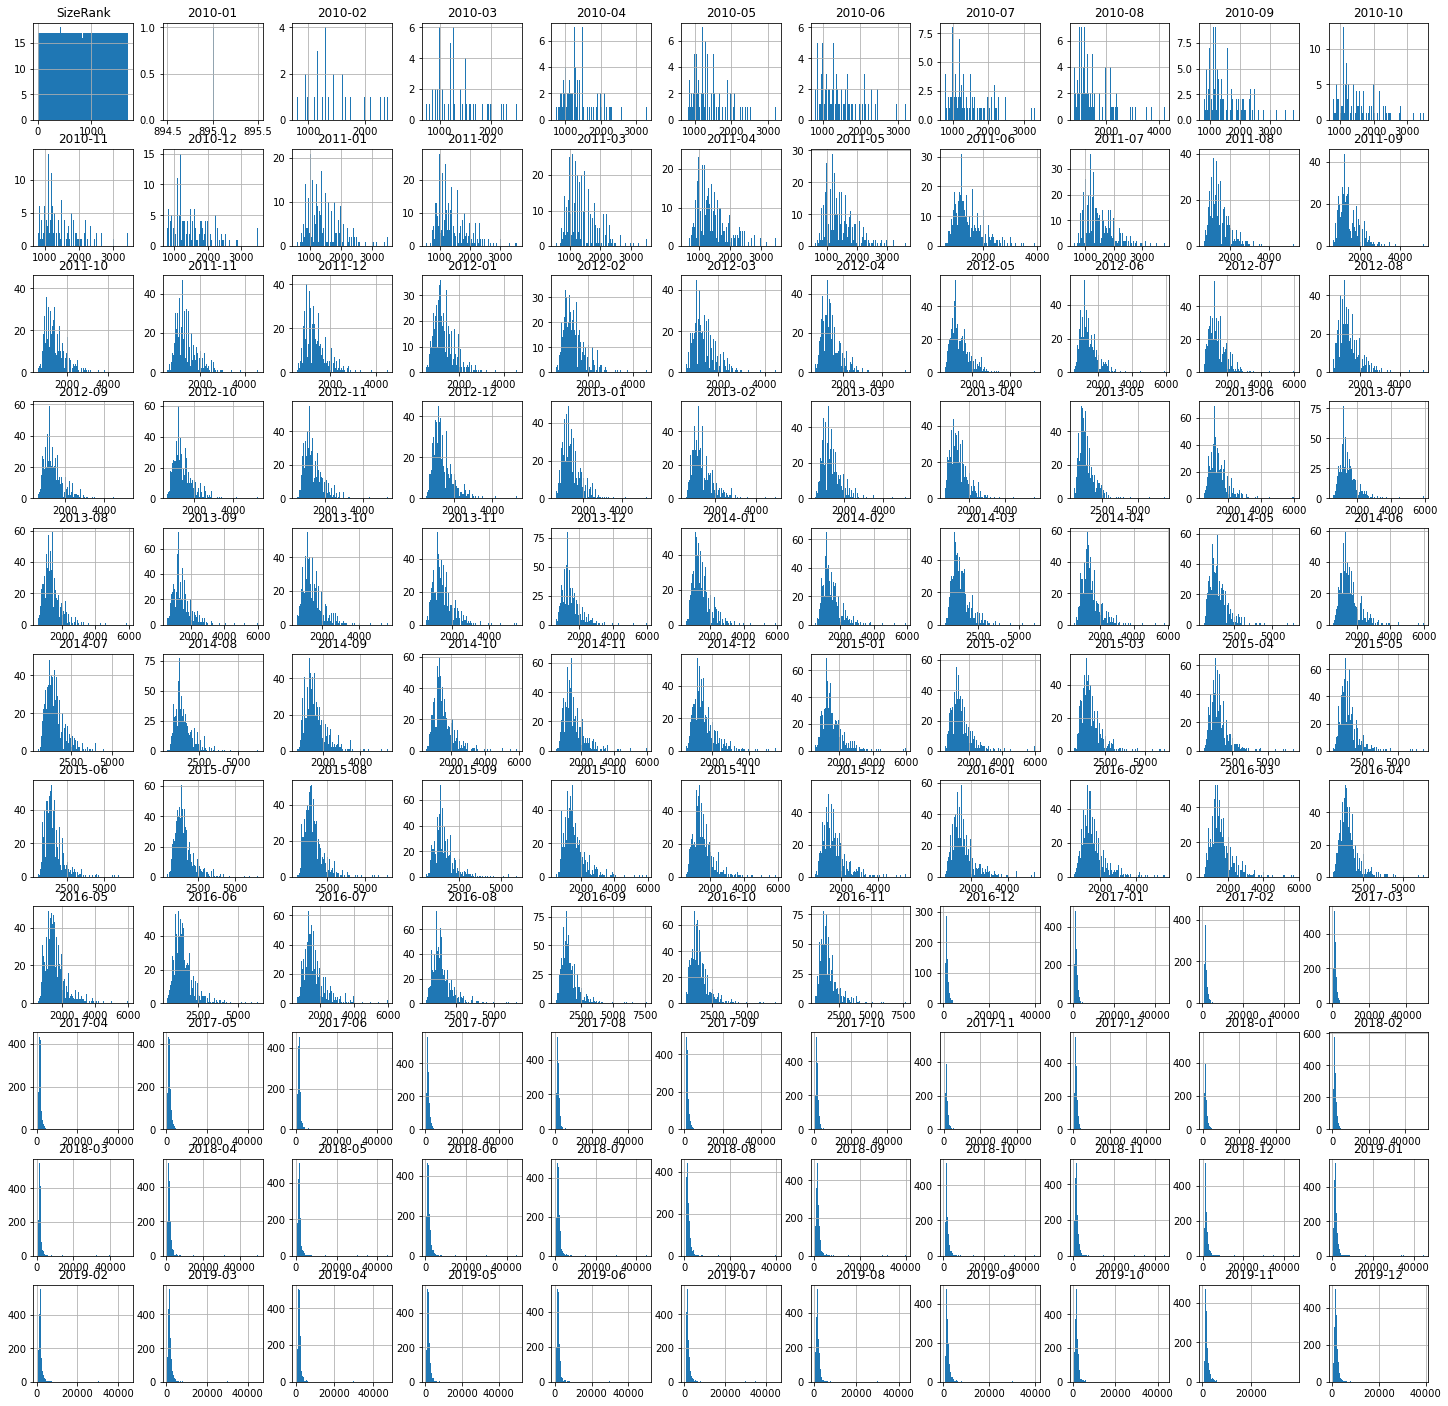

In [18]:
import matplotlib.pyplot as plt

MedianRentalPrice_Dataframe.hist(bins=100,figsize=(25,25))
plt.show()

In [19]:
corr_matrix = MedianRentalPrice_Dataframe.corr()

In [20]:
corr_matrix["2019-12"].sort_values(ascending=False)

2019-12     1.000000
2019-11     0.997694
2019-10     0.996038
2019-09     0.995484
2019-08     0.993342
              ...   
2011-06     0.911972
2011-07     0.908988
2010-02     0.874229
SizeRank    0.144152
2010-01          NaN
Name: 2019-12, Length: 121, dtype: float64

## Seperating Quantitative Data and Categorical Data.
---

In [21]:
quantative_columns = [f for f in MedianRentalPrice_Dataframe.columns if MedianRentalPrice_Dataframe.dtypes[f] != 'object']
categorical_columns = [f for f in MedianRentalPrice_Dataframe.columns if MedianRentalPrice_Dataframe.dtypes[f] == 'object']

In [22]:
quantative_columns

['SizeRank',
 '2010-01',
 '2010-02',
 '2010-03',
 '2010-04',
 '2010-05',
 '2010-06',
 '2010-07',
 '2010-08',
 '2010-09',
 '2010-10',
 '2010-11',
 '2010-12',
 '2011-01',
 '2011-02',
 '2011-03',
 '2011-04',
 '2011-05',
 '2011-06',
 '2011-07',
 '2011-08',
 '2011-09',
 '2011-10',
 '2011-11',
 '2011-12',
 '2012-01',
 '2012-02',
 '2012-03',
 '2012-04',
 '2012-05',
 '2012-06',
 '2012-07',
 '2012-08',
 '2012-09',
 '2012-10',
 '2012-11',
 '2012-12',
 '2013-01',
 '2013-02',
 '2013-03',
 '2013-04',
 '2013-05',
 '2013-06',
 '2013-07',
 '2013-08',
 '2013-09',
 '2013-10',
 '2013-11',
 '2013-12',
 '2014-01',
 '2014-02',
 '2014-03',
 '2014-04',
 '2014-05',
 '2014-06',
 '2014-07',
 '2014-08',
 '2014-09',
 '2014-10',
 '2014-11',
 '2014-12',
 '2015-01',
 '2015-02',
 '2015-03',
 '2015-04',
 '2015-05',
 '2015-06',
 '2015-07',
 '2015-08',
 '2015-09',
 '2015-10',
 '2015-11',
 '2015-12',
 '2016-01',
 '2016-02',
 '2016-03',
 '2016-04',
 '2016-05',
 '2016-06',
 '2016-07',
 '2016-08',
 '2016-09',
 '2016-10',
 '2

In [23]:
categorical_columns

['RegionName', 'State', 'Metro', 'CountyName']

In [24]:

quantatative_dataframe = pd.DataFrame()
quantatative_dataframe.reset_index()
qualitative_dataframe = pd.DataFrame()
qualitative_dataframe.reset_index()

for column in quantative_columns:
    quantatative_dataframe= pd.concat((quantatative_dataframe,MedianRentalPrice_Dataframe[column]),axis=1)
    
for category in categorical_columns:
    qualitative_dataframe = pd.concat((qualitative_dataframe,MedianRentalPrice_Dataframe[category]),axis=1)


In [25]:
quantatative_dataframe

,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,1,NaN,NaN,NaN,NaN,2300.0,2450.0,2495.0,2400.0,2600.0,...,2800.0,2875.0,2900.0,2895.0,2850.0,2925.0,2900.0,2900.0,2899.0,2900.0
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3500.0,3500.0,3500.0,3520.0,3500.0,3600.0,3607.0,3665.0,3600.0,3550.0
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1500.0,1544.0,1550.0,1550.0,1550.0,1550.0,1550.0,1500.0,1500.0,1500.0
3,4,NaN,1600.0,1500.0,1500.0,1500.0,1550.0,1500.0,1500.0,1600.0,...,1775.0,1795.0,1800.0,1800.0,1800.0,1812.5,1800.0,1800.0,1766.0,1750.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1200.0,1195.0,...,1300.0,1300.0,1325.0,1345.0,1349.0,1322.5,1299.0,1300.0,1299.0,1300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694,1695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2700.0,2650.0,2737.5,2775.0,3000.0,3000.0,3150.0,3000.0,3150.0,3395.0
1695,1696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30000.0,33333.0,36000.0,36333.0,35000.0,30000.0,30000.0,34000.0,33041.5,35000.0
1696,1697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30000.0,30000.0,30000.0,30000.0,30000.0,29500.0,30000.0,30000.0,30000.0,31666.0
1697,1698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,990.0,990.0,990.0,990.0,909.0,939.0,909.0,909.0,939.0,909.0


In [26]:
qualitative_dataframe

,RegionName,State,Metro,CountyName
0,New York,NY,New York-Newark-Jersey City,Queens County
1,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County
2,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County
3,Chicago,IL,Chicago-Naperville-Elgin,Cook County
4,San Antonio,TX,San Antonio-New Braunfels,Bexar County
...,...,...,...,...
1694,Hillsboro Beach,FL,Miami-Fort Lauderdale-West Palm Beach,Broward County
1695,Amagansett,NY,New York-Newark-Jersey City,Suffolk County
1696,Quogue,NY,New York-Newark-Jersey City,Suffolk County
1697,Ogden,KS,Manhattan,Riley County


In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le = LabelEncoder()

In [29]:
encoded_categorical_data = qualitative_dataframe.apply(le.fit_transform)

In [30]:
encoded_categorical_data

,RegionName,State,Metro,CountyName
0,941,34,216,365
1,787,4,181,258
2,614,43,139,181
3,229,14,59,97
4,1221,43,272,32
...,...,...,...,...
1694,594,9,196,45
1695,25,34,216,440
1696,1129,34,216,440
1697,1002,16,190,373


In [31]:
classes = enumerate(le.classes_)
for c in classes:
    print(c)
    

(0, 'Ada County')
(1, 'Adams County')
(2, 'Aiken County')
(3, 'Alachua County')
(4, 'Alamance County')
(5, 'Alameda County')
(6, 'Albany County')
(7, 'Albemarle County')
(8, 'Alexandria City')
(9, 'Allegheny County')
(10, 'Allen County')
(11, 'Anchorage Borough')
(12, 'Anderson County')
(13, 'Anne Arundel County')
(14, 'Anoka County')
(15, 'Arapahoe County')
(16, 'Arlington County')
(17, 'Ascension Parish')
(18, 'Atlantic County')
(19, 'Baldwin County')
(20, 'Baltimore City')
(21, 'Baltimore County')
(22, 'Bannock County')
(23, 'Bartholomew County')
(24, 'Bartow County')
(25, 'Beaufort County')
(26, 'Bell County')
(27, 'Benton County')
(28, 'Bergen County')
(29, 'Berkeley County')
(30, 'Berks County')
(31, 'Bernalillo County')
(32, 'Bexar County')
(33, 'Bibb County')
(34, 'Black Hawk County')
(35, 'Blount County')
(36, 'Boone County')
(37, 'Bossier Parish')
(38, 'Boulder County')
(39, 'Bradley County')
(40, 'Brazoria County')
(41, 'Brazos County')
(42, 'Brevard County')
(43, 'Brookings

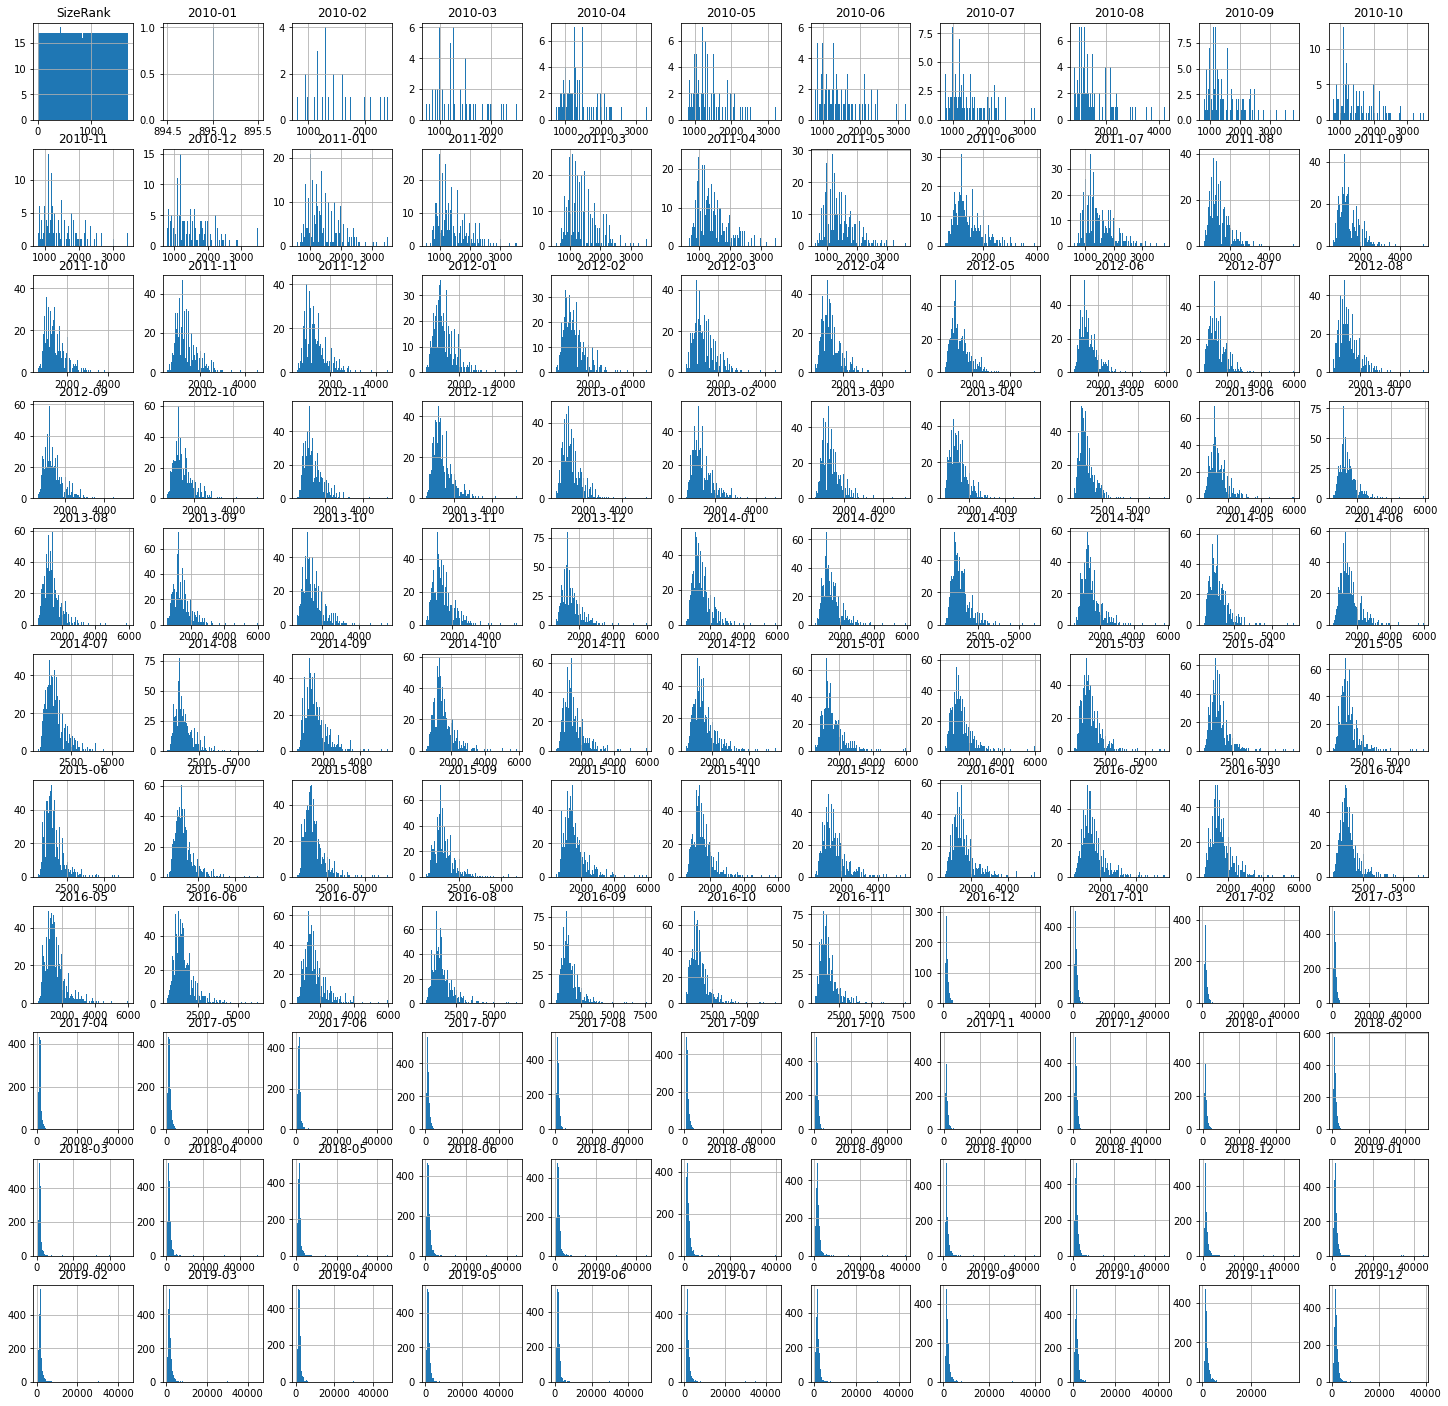

In [32]:
import matplotlib.pyplot as plt

quantatative_dataframe.hist(bins=100,figsize=(25,25))
plt.show()

In [33]:
from sklearn.impute import SimpleImputer

In [34]:
simp = SimpleImputer(strategy="mean")
simp.fit(quantatative_dataframe)

SimpleImputer()

In [35]:
simp.statistics_

array([ 849.99234844,  895.        , 1408.43333333, 1343.04032258,
       1408.325     , 1420.36144578, 1446.375     , 1481.85      ,
       1547.79292929, 1531.27916667, 1499.45185185, 1496.51666667,
       1526.81024096, 1440.13908451, 1412.00131926, 1422.74      ,
       1440.1703163 , 1451.92775229, 1459.77659574, 1449.15768463,
       1441.4230038 , 1431.00276753, 1407.15248227, 1387.41811847,
       1380.37307033, 1373.05966387, 1378.42013311, 1385.64566285,
       1391.78250401, 1407.73370429, 1424.67896389, 1420.77639752,
       1410.08819018, 1409.74314024, 1400.31900452, 1393.09715994,
       1388.42814815, 1385.03733529, 1380.85217391, 1389.37752161,
       1410.36447932, 1434.54397163, 1450.75941423, 1447.94664843,
       1442.02864939, 1465.33604336, 1488.74966622, 1484.42160738,
       1485.46447368, 1477.21045752, 1475.31282383, 1474.0971686 ,
       1480.01540436, 1519.89666239, 1535.21954315, 1548.07484277,
       1550.97319202, 1549.21401985, 1543.90578818, 1543.36855

In [36]:
X = simp.transform(quantatative_dataframe)

imputed_quant_data = pd.DataFrame(X, columns=quantatative_dataframe.columns, index = quantatative_dataframe.index)

In [37]:
imputed_quant_data

,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,1.0,895.0,1408.433333,1343.040323,1408.325,2300.000000,2450.000,2495.00,2400.000000,2600.000000,...,2800.0,2875.0,2900.0,2895.0,2850.0,2925.0,2900.0,2900.0,2899.0,2900.0
1,2.0,895.0,1408.433333,1343.040323,1408.325,1420.361446,1446.375,1481.85,1547.792929,1531.279167,...,3500.0,3500.0,3500.0,3520.0,3500.0,3600.0,3607.0,3665.0,3600.0,3550.0
2,3.0,895.0,1408.433333,1343.040323,1408.325,1420.361446,1446.375,1481.85,1547.792929,1531.279167,...,1500.0,1544.0,1550.0,1550.0,1550.0,1550.0,1550.0,1500.0,1500.0,1500.0
3,4.0,895.0,1600.000000,1500.000000,1500.000,1500.000000,1550.000,1500.00,1500.000000,1600.000000,...,1775.0,1795.0,1800.0,1800.0,1800.0,1812.5,1800.0,1800.0,1766.0,1750.0
4,5.0,895.0,1408.433333,1343.040323,1408.325,1420.361446,1446.375,1481.85,1200.000000,1195.000000,...,1300.0,1300.0,1325.0,1345.0,1349.0,1322.5,1299.0,1300.0,1299.0,1300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694,1695.0,895.0,1408.433333,1343.040323,1408.325,1420.361446,1446.375,1481.85,1547.792929,1531.279167,...,2700.0,2650.0,2737.5,2775.0,3000.0,3000.0,3150.0,3000.0,3150.0,3395.0
1695,1696.0,895.0,1408.433333,1343.040323,1408.325,1420.361446,1446.375,1481.85,1547.792929,1531.279167,...,30000.0,33333.0,36000.0,36333.0,35000.0,30000.0,30000.0,34000.0,33041.5,35000.0
1696,1697.0,895.0,1408.433333,1343.040323,1408.325,1420.361446,1446.375,1481.85,1547.792929,1531.279167,...,30000.0,30000.0,30000.0,30000.0,30000.0,29500.0,30000.0,30000.0,30000.0,31666.0
1697,1698.0,895.0,1408.433333,1343.040323,1408.325,1420.361446,1446.375,1481.85,1547.792929,1531.279167,...,990.0,990.0,990.0,990.0,909.0,939.0,909.0,909.0,939.0,909.0


In [38]:
training_data = pd.concat([encoded_categorical_data,imputed_quant_data],axis=1)

In [39]:
training_data

,RegionName,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,941,34,216,365,1.0,895.0,1408.433333,1343.040323,1408.325,2300.000000,...,2800.0,2875.0,2900.0,2895.0,2850.0,2925.0,2900.0,2900.0,2899.0,2900.0
1,787,4,181,258,2.0,895.0,1408.433333,1343.040323,1408.325,1420.361446,...,3500.0,3500.0,3500.0,3520.0,3500.0,3600.0,3607.0,3665.0,3600.0,3550.0
2,614,43,139,181,3.0,895.0,1408.433333,1343.040323,1408.325,1420.361446,...,1500.0,1544.0,1550.0,1550.0,1550.0,1550.0,1550.0,1500.0,1500.0,1500.0
3,229,14,59,97,4.0,895.0,1600.000000,1500.000000,1500.000,1500.000000,...,1775.0,1795.0,1800.0,1800.0,1800.0,1812.5,1800.0,1800.0,1766.0,1750.0
4,1221,43,272,32,5.0,895.0,1408.433333,1343.040323,1408.325,1420.361446,...,1300.0,1300.0,1325.0,1345.0,1349.0,1322.5,1299.0,1300.0,1299.0,1300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694,594,9,196,45,1695.0,895.0,1408.433333,1343.040323,1408.325,1420.361446,...,2700.0,2650.0,2737.5,2775.0,3000.0,3000.0,3150.0,3000.0,3150.0,3395.0
1695,25,34,216,440,1696.0,895.0,1408.433333,1343.040323,1408.325,1420.361446,...,30000.0,33333.0,36000.0,36333.0,35000.0,30000.0,30000.0,34000.0,33041.5,35000.0
1696,1129,34,216,440,1697.0,895.0,1408.433333,1343.040323,1408.325,1420.361446,...,30000.0,30000.0,30000.0,30000.0,30000.0,29500.0,30000.0,30000.0,30000.0,31666.0
1697,1002,16,190,373,1698.0,895.0,1408.433333,1343.040323,1408.325,1420.361446,...,990.0,990.0,990.0,990.0,909.0,939.0,909.0,909.0,939.0,909.0


In [40]:
training_data.corr()

,RegionName,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
RegionName,1.000000,-0.006109,0.246202,0.117000,-0.020464,NaN,0.007241,-0.025556,0.003041,0.001499,...,0.019832,0.014926,0.013147,0.012133,0.014023,0.015931,0.016608,0.012630,0.014300,0.012795
State,-0.006109,1.000000,-0.018815,-0.034231,-0.023269,NaN,-0.027974,-0.003493,-0.005857,0.004938,...,-0.068460,-0.067545,-0.060081,-0.061514,-0.066178,-0.077685,-0.082621,-0.075146,-0.084880,-0.080413
Metro,0.246202,-0.018815,1.000000,0.267221,-0.026897,NaN,0.026398,0.031643,0.037058,0.041166,...,0.101686,0.101714,0.099904,0.101491,0.104411,0.107812,0.109877,0.105586,0.109901,0.107472
CountyName,0.117000,-0.034231,0.267221,1.000000,-0.032239,NaN,0.004357,0.018926,0.029002,0.030888,...,0.105021,0.104181,0.102797,0.102385,0.104709,0.106055,0.106991,0.107218,0.109232,0.108022
SizeRank,-0.020464,-0.023269,-0.026897,-0.032239,1.000000,NaN,-0.023700,-0.008816,-0.005294,-0.010087,...,0.140852,0.139379,0.137498,0.138768,0.140783,0.142493,0.144810,0.142218,0.145476,0.144152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08,0.015931,-0.077685,0.107812,0.106055,0.142493,NaN,0.035590,0.049943,0.067195,0.069616,...,0.991368,0.996054,0.994909,0.995866,0.996883,1.000000,0.998106,0.996590,0.992699,0.993342
2019-09,0.016608,-0.082621,0.109877,0.106991,0.144810,NaN,0.036436,0.051000,0.068402,0.070869,...,0.990253,0.993713,0.991415,0.992914,0.995354,0.998106,1.000000,0.996194,0.994233,0.995484
2019-10,0.012630,-0.075146,0.105586,0.107218,0.142218,NaN,0.034631,0.048576,0.064910,0.067317,...,0.986991,0.994318,0.994410,0.994623,0.995546,0.996590,0.996194,1.000000,0.996868,0.996038
2019-11,0.014300,-0.084880,0.109901,0.109232,0.145476,NaN,0.036172,0.051337,0.068733,0.071257,...,0.979821,0.988088,0.987463,0.987684,0.990586,0.992699,0.994233,0.996868,1.000000,0.997694


<AxesSubplot:>

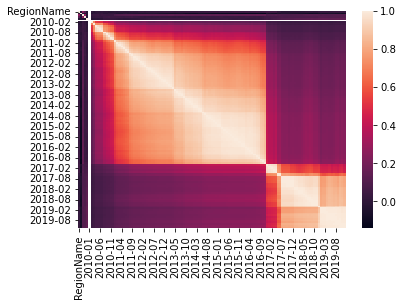

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(training_data.corr())

In [42]:
transposed_quant_data = imputed_quant_data.T

In [43]:
transposed_quant_data

,0,1,2,3,4,5,6,7,8,9,...,1689,1690,1691,1692,1693,1694,1695,1696,1697,1698
SizeRank,1.000000,2.000000,3.000000,4.0,5.000000,6.0,7.0,8.0,9.000000,10.000000,...,1690.000000,1691.000000,1692.000000,1693.000000,1694.000000,1695.000000,1696.000000,1697.000000,1698.000000,1699.000000
2010-01,895.000000,895.000000,895.000000,895.0,895.000000,895.0,895.0,895.0,895.000000,895.000000,...,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000
2010-02,1408.433333,1408.433333,1408.433333,1600.0,1408.433333,1350.0,1300.0,1295.0,1408.433333,1408.433333,...,1408.433333,1408.433333,1408.433333,1408.433333,1408.433333,1408.433333,1408.433333,1408.433333,1408.433333,1408.433333
2010-03,1343.040323,1343.040323,1343.040323,1500.0,1343.040323,1292.5,1200.0,1250.0,1343.040323,1343.040323,...,1343.040323,1343.040323,1343.040323,1343.040323,1343.040323,1343.040323,1343.040323,1343.040323,1343.040323,1343.040323
2010-04,1408.325000,1408.325000,1408.325000,1500.0,1408.325000,1250.0,1200.0,1250.0,1408.325000,1408.325000,...,1408.325000,1408.325000,1408.325000,1408.325000,1408.325000,1408.325000,1408.325000,1408.325000,1408.325000,1408.325000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08,2925.000000,3600.000000,1550.000000,1812.5,1322.500000,1500.0,1500.0,1515.0,2750.000000,1795.000000,...,5875.000000,4000.000000,43333.000000,1387.500000,1600.000000,3000.000000,30000.000000,29500.000000,939.000000,30000.000000
2019-09,2900.000000,3607.000000,1550.000000,1800.0,1299.000000,1500.0,1495.0,1500.0,2750.000000,1795.000000,...,5875.000000,4000.000000,40000.000000,1345.000000,1600.000000,3150.000000,30000.000000,30000.000000,909.000000,30000.000000
2019-10,2900.000000,3665.000000,1500.000000,1800.0,1300.000000,1500.0,1460.0,1500.0,2700.000000,1750.000000,...,5875.000000,3775.000000,43333.000000,1295.000000,1600.000000,3000.000000,34000.000000,30000.000000,909.000000,28333.000000
2019-11,2899.000000,3600.000000,1500.000000,1766.0,1299.000000,1500.0,1450.0,1500.0,2700.000000,1750.000000,...,6000.000000,3450.000000,37500.000000,1275.000000,1575.000000,3150.000000,33041.500000,30000.000000,939.000000,25000.000000


## Creating a new dataframe to reorganize data to get more numerical features in base dataset.
---

In [44]:
#size rank has little to no correlation to median rental price so i dropped it.
median_rental_price_data = imputed_quant_data.drop('SizeRank',axis=1)

In [45]:
median_rental_price_data

,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,895.0,1408.433333,1343.040323,1408.325,2300.000000,2450.000,2495.00,2400.000000,2600.000000,2800.000000,...,2800.0,2875.0,2900.0,2895.0,2850.0,2925.0,2900.0,2900.0,2899.0,2900.0
1,895.0,1408.433333,1343.040323,1408.325,1420.361446,1446.375,1481.85,1547.792929,1531.279167,1499.451852,...,3500.0,3500.0,3500.0,3520.0,3500.0,3600.0,3607.0,3665.0,3600.0,3550.0
2,895.0,1408.433333,1343.040323,1408.325,1420.361446,1446.375,1481.85,1547.792929,1531.279167,1499.451852,...,1500.0,1544.0,1550.0,1550.0,1550.0,1550.0,1550.0,1500.0,1500.0,1500.0
3,895.0,1600.000000,1500.000000,1500.000,1500.000000,1550.000,1500.00,1500.000000,1600.000000,1650.000000,...,1775.0,1795.0,1800.0,1800.0,1800.0,1812.5,1800.0,1800.0,1766.0,1750.0
4,895.0,1408.433333,1343.040323,1408.325,1420.361446,1446.375,1481.85,1200.000000,1195.000000,1197.000000,...,1300.0,1300.0,1325.0,1345.0,1349.0,1322.5,1299.0,1300.0,1299.0,1300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694,895.0,1408.433333,1343.040323,1408.325,1420.361446,1446.375,1481.85,1547.792929,1531.279167,1499.451852,...,2700.0,2650.0,2737.5,2775.0,3000.0,3000.0,3150.0,3000.0,3150.0,3395.0
1695,895.0,1408.433333,1343.040323,1408.325,1420.361446,1446.375,1481.85,1547.792929,1531.279167,1499.451852,...,30000.0,33333.0,36000.0,36333.0,35000.0,30000.0,30000.0,34000.0,33041.5,35000.0
1696,895.0,1408.433333,1343.040323,1408.325,1420.361446,1446.375,1481.85,1547.792929,1531.279167,1499.451852,...,30000.0,30000.0,30000.0,30000.0,30000.0,29500.0,30000.0,30000.0,30000.0,31666.0
1697,895.0,1408.433333,1343.040323,1408.325,1420.361446,1446.375,1481.85,1547.792929,1531.279167,1499.451852,...,990.0,990.0,990.0,990.0,909.0,939.0,909.0,909.0,939.0,909.0


In [46]:
year_month = [c for c in median_rental_price_data.columns]

In [47]:
year_month

['2010-01',
 '2010-02',
 '2010-03',
 '2010-04',
 '2010-05',
 '2010-06',
 '2010-07',
 '2010-08',
 '2010-09',
 '2010-10',
 '2010-11',
 '2010-12',
 '2011-01',
 '2011-02',
 '2011-03',
 '2011-04',
 '2011-05',
 '2011-06',
 '2011-07',
 '2011-08',
 '2011-09',
 '2011-10',
 '2011-11',
 '2011-12',
 '2012-01',
 '2012-02',
 '2012-03',
 '2012-04',
 '2012-05',
 '2012-06',
 '2012-07',
 '2012-08',
 '2012-09',
 '2012-10',
 '2012-11',
 '2012-12',
 '2013-01',
 '2013-02',
 '2013-03',
 '2013-04',
 '2013-05',
 '2013-06',
 '2013-07',
 '2013-08',
 '2013-09',
 '2013-10',
 '2013-11',
 '2013-12',
 '2014-01',
 '2014-02',
 '2014-03',
 '2014-04',
 '2014-05',
 '2014-06',
 '2014-07',
 '2014-08',
 '2014-09',
 '2014-10',
 '2014-11',
 '2014-12',
 '2015-01',
 '2015-02',
 '2015-03',
 '2015-04',
 '2015-05',
 '2015-06',
 '2015-07',
 '2015-08',
 '2015-09',
 '2015-10',
 '2015-11',
 '2015-12',
 '2016-01',
 '2016-02',
 '2016-03',
 '2016-04',
 '2016-05',
 '2016-06',
 '2016-07',
 '2016-08',
 '2016-09',
 '2016-10',
 '2016-11',
 '20

In [48]:
years = []
months=[]
for x in year_month:
    
    years.append(x.split('-')[0])
    months.append(x.split('-')[1])

In [49]:
years

['2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2010',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2019',
 '2019',
 '2019',
 

In [50]:
months

['01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12']

In [51]:
new_data = {'month':[m for m in months],'year':[y for y in years]}

In [52]:
new_data

{'month': ['01',
  '02',
  '03',
  '04',
  '05',
  '06',
  '07',
  '08',
  '09',
  '10',
  '11',
  '12',
  '01',
  '02',
  '03',
  '04',
  '05',
  '06',
  '07',
  '08',
  '09',
  '10',
  '11',
  '12',
  '01',
  '02',
  '03',
  '04',
  '05',
  '06',
  '07',
  '08',
  '09',
  '10',
  '11',
  '12',
  '01',
  '02',
  '03',
  '04',
  '05',
  '06',
  '07',
  '08',
  '09',
  '10',
  '11',
  '12',
  '01',
  '02',
  '03',
  '04',
  '05',
  '06',
  '07',
  '08',
  '09',
  '10',
  '11',
  '12',
  '01',
  '02',
  '03',
  '04',
  '05',
  '06',
  '07',
  '08',
  '09',
  '10',
  '11',
  '12',
  '01',
  '02',
  '03',
  '04',
  '05',
  '06',
  '07',
  '08',
  '09',
  '10',
  '11',
  '12',
  '01',
  '02',
  '03',
  '04',
  '05',
  '06',
  '07',
  '08',
  '09',
  '10',
  '11',
  '12',
  '01',
  '02',
  '03',
  '04',
  '05',
  '06',
  '07',
  '08',
  '09',
  '10',
  '11',
  '12',
  '01',
  '02',
  '03',
  '04',
  '05',
  '06',
  '07',
  '08',
  '09',
  '10',
  '11',
  '12'],
 'year': ['2010',
  '2010',
  

In [53]:
year_month_df = pd.DataFrame(data = new_data)

In [54]:
year_month_df

,month,year
0,01,2010
1,02,2010
2,03,2010
3,04,2010
4,05,2010
...,...,...
115,08,2019
116,09,2019
117,10,2019
118,11,2019


In [55]:
mrp=[]
for ym in year_month:
    rent = median_rental_price_data[ym]
    mrp.append(rent)

In [56]:
mrp

[0       895.0
 1       895.0
 2       895.0
 3       895.0
 4       895.0
         ...  
 1694    895.0
 1695    895.0
 1696    895.0
 1697    895.0
 1698    895.0
 Name: 2010-01, Length: 1699, dtype: float64,
 0       1408.433333
 1       1408.433333
 2       1408.433333
 3       1600.000000
 4       1408.433333
            ...     
 1694    1408.433333
 1695    1408.433333
 1696    1408.433333
 1697    1408.433333
 1698    1408.433333
 Name: 2010-02, Length: 1699, dtype: float64,
 0       1343.040323
 1       1343.040323
 2       1343.040323
 3       1500.000000
 4       1343.040323
            ...     
 1694    1343.040323
 1695    1343.040323
 1696    1343.040323
 1697    1343.040323
 1698    1343.040323
 Name: 2010-03, Length: 1699, dtype: float64,
 0       1408.325
 1       1408.325
 2       1408.325
 3       1500.000
 4       1408.325
           ...   
 1694    1408.325
 1695    1408.325
 1696    1408.325
 1697    1408.325
 1698    1408.325
 Name: 2010-04, Length: 1699, dtype: 

In [57]:
mrp_df = pd.DataFrame(data=mrp)

In [58]:
mrp_df

,0,1,2,3,4,5,6,7,8,9,...,1689,1690,1691,1692,1693,1694,1695,1696,1697,1698
2010-01,895.000000,895.000000,895.000000,895.0,895.000000,895.0,895.0,895.0,895.000000,895.000000,...,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000
2010-02,1408.433333,1408.433333,1408.433333,1600.0,1408.433333,1350.0,1300.0,1295.0,1408.433333,1408.433333,...,1408.433333,1408.433333,1408.433333,1408.433333,1408.433333,1408.433333,1408.433333,1408.433333,1408.433333,1408.433333
2010-03,1343.040323,1343.040323,1343.040323,1500.0,1343.040323,1292.5,1200.0,1250.0,1343.040323,1343.040323,...,1343.040323,1343.040323,1343.040323,1343.040323,1343.040323,1343.040323,1343.040323,1343.040323,1343.040323,1343.040323
2010-04,1408.325000,1408.325000,1408.325000,1500.0,1408.325000,1250.0,1200.0,1250.0,1408.325000,1408.325000,...,1408.325000,1408.325000,1408.325000,1408.325000,1408.325000,1408.325000,1408.325000,1408.325000,1408.325000,1408.325000
2010-05,2300.000000,1420.361446,1420.361446,1500.0,1420.361446,1300.0,1200.0,1250.0,1420.361446,1420.361446,...,1420.361446,1420.361446,1420.361446,1420.361446,1420.361446,1420.361446,1420.361446,1420.361446,1420.361446,1420.361446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08,2925.000000,3600.000000,1550.000000,1812.5,1322.500000,1500.0,1500.0,1515.0,2750.000000,1795.000000,...,5875.000000,4000.000000,43333.000000,1387.500000,1600.000000,3000.000000,30000.000000,29500.000000,939.000000,30000.000000
2019-09,2900.000000,3607.000000,1550.000000,1800.0,1299.000000,1500.0,1495.0,1500.0,2750.000000,1795.000000,...,5875.000000,4000.000000,40000.000000,1345.000000,1600.000000,3150.000000,30000.000000,30000.000000,909.000000,30000.000000
2019-10,2900.000000,3665.000000,1500.000000,1800.0,1300.000000,1500.0,1460.0,1500.0,2700.000000,1750.000000,...,5875.000000,3775.000000,43333.000000,1295.000000,1600.000000,3000.000000,34000.000000,30000.000000,909.000000,28333.000000
2019-11,2899.000000,3600.000000,1500.000000,1766.0,1299.000000,1500.0,1450.0,1500.0,2700.000000,1750.000000,...,6000.000000,3450.000000,37500.000000,1275.000000,1575.000000,3150.000000,33041.500000,30000.000000,939.000000,25000.000000


In [59]:
transposed_df = mrp_df.T

In [60]:
transposed_df

,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,895.0,1408.433333,1343.040323,1408.325,2300.000000,2450.000,2495.00,2400.000000,2600.000000,2800.000000,...,2800.0,2875.0,2900.0,2895.0,2850.0,2925.0,2900.0,2900.0,2899.0,2900.0
1,895.0,1408.433333,1343.040323,1408.325,1420.361446,1446.375,1481.85,1547.792929,1531.279167,1499.451852,...,3500.0,3500.0,3500.0,3520.0,3500.0,3600.0,3607.0,3665.0,3600.0,3550.0
2,895.0,1408.433333,1343.040323,1408.325,1420.361446,1446.375,1481.85,1547.792929,1531.279167,1499.451852,...,1500.0,1544.0,1550.0,1550.0,1550.0,1550.0,1550.0,1500.0,1500.0,1500.0
3,895.0,1600.000000,1500.000000,1500.000,1500.000000,1550.000,1500.00,1500.000000,1600.000000,1650.000000,...,1775.0,1795.0,1800.0,1800.0,1800.0,1812.5,1800.0,1800.0,1766.0,1750.0
4,895.0,1408.433333,1343.040323,1408.325,1420.361446,1446.375,1481.85,1200.000000,1195.000000,1197.000000,...,1300.0,1300.0,1325.0,1345.0,1349.0,1322.5,1299.0,1300.0,1299.0,1300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694,895.0,1408.433333,1343.040323,1408.325,1420.361446,1446.375,1481.85,1547.792929,1531.279167,1499.451852,...,2700.0,2650.0,2737.5,2775.0,3000.0,3000.0,3150.0,3000.0,3150.0,3395.0
1695,895.0,1408.433333,1343.040323,1408.325,1420.361446,1446.375,1481.85,1547.792929,1531.279167,1499.451852,...,30000.0,33333.0,36000.0,36333.0,35000.0,30000.0,30000.0,34000.0,33041.5,35000.0
1696,895.0,1408.433333,1343.040323,1408.325,1420.361446,1446.375,1481.85,1547.792929,1531.279167,1499.451852,...,30000.0,30000.0,30000.0,30000.0,30000.0,29500.0,30000.0,30000.0,30000.0,31666.0
1697,895.0,1408.433333,1343.040323,1408.325,1420.361446,1446.375,1481.85,1547.792929,1531.279167,1499.451852,...,990.0,990.0,990.0,990.0,909.0,939.0,909.0,909.0,939.0,909.0


In [61]:
data = transposed_df['2010-01']

In [62]:
data

0       895.0
1       895.0
2       895.0
3       895.0
4       895.0
        ...  
1694    895.0
1695    895.0
1696    895.0
1697    895.0
1698    895.0
Name: 2010-01, Length: 1699, dtype: float64

In [63]:
data.T


0       895.0
1       895.0
2       895.0
3       895.0
4       895.0
        ...  
1694    895.0
1695    895.0
1696    895.0
1697    895.0
1698    895.0
Name: 2010-01, Length: 1699, dtype: float64

In [64]:
rent = [r for r in data]

In [65]:
rent_df = pd.DataFrame(data=rent)

In [66]:
rent_df.T

,0,1,2,3,4,5,6,7,8,9,...,1689,1690,1691,1692,1693,1694,1695,1696,1697,1698
0,895.0,895.0,895.0,895.0,895.0,895.0,895.0,895.0,895.0,895.0,...,895.0,895.0,895.0,895.0,895.0,895.0,895.0,895.0,895.0,895.0


In [67]:
print(rent_df.T)

    0      1      2      3      4      5      6      7      8      9     ...  \
0  895.0  895.0  895.0  895.0  895.0  895.0  895.0  895.0  895.0  895.0  ...   

    1689   1690   1691   1692   1693   1694   1695   1696   1697   1698  
0  895.0  895.0  895.0  895.0  895.0  895.0  895.0  895.0  895.0  895.0  

[1 rows x 1699 columns]


In [68]:
mrp_by_monthYear = pd.DataFrame()

for ym in year_month:
    data = transposed_df[ym]
    rent=[r for r in data]
    rent_df = pd.DataFrame(data=rent,columns=[ym])
    mrp_by_monthYear= pd.concat([mrp_by_monthYear,rent_df],axis=1)
    

In [69]:
mrp_by_monthYear

,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,895.0,1408.433333,1343.040323,1408.325,2300.000000,2450.000,2495.00,2400.000000,2600.000000,2800.000000,...,2800.0,2875.0,2900.0,2895.0,2850.0,2925.0,2900.0,2900.0,2899.0,2900.0
1,895.0,1408.433333,1343.040323,1408.325,1420.361446,1446.375,1481.85,1547.792929,1531.279167,1499.451852,...,3500.0,3500.0,3500.0,3520.0,3500.0,3600.0,3607.0,3665.0,3600.0,3550.0
2,895.0,1408.433333,1343.040323,1408.325,1420.361446,1446.375,1481.85,1547.792929,1531.279167,1499.451852,...,1500.0,1544.0,1550.0,1550.0,1550.0,1550.0,1550.0,1500.0,1500.0,1500.0
3,895.0,1600.000000,1500.000000,1500.000,1500.000000,1550.000,1500.00,1500.000000,1600.000000,1650.000000,...,1775.0,1795.0,1800.0,1800.0,1800.0,1812.5,1800.0,1800.0,1766.0,1750.0
4,895.0,1408.433333,1343.040323,1408.325,1420.361446,1446.375,1481.85,1200.000000,1195.000000,1197.000000,...,1300.0,1300.0,1325.0,1345.0,1349.0,1322.5,1299.0,1300.0,1299.0,1300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694,895.0,1408.433333,1343.040323,1408.325,1420.361446,1446.375,1481.85,1547.792929,1531.279167,1499.451852,...,2700.0,2650.0,2737.5,2775.0,3000.0,3000.0,3150.0,3000.0,3150.0,3395.0
1695,895.0,1408.433333,1343.040323,1408.325,1420.361446,1446.375,1481.85,1547.792929,1531.279167,1499.451852,...,30000.0,33333.0,36000.0,36333.0,35000.0,30000.0,30000.0,34000.0,33041.5,35000.0
1696,895.0,1408.433333,1343.040323,1408.325,1420.361446,1446.375,1481.85,1547.792929,1531.279167,1499.451852,...,30000.0,30000.0,30000.0,30000.0,30000.0,29500.0,30000.0,30000.0,30000.0,31666.0
1697,895.0,1408.433333,1343.040323,1408.325,1420.361446,1446.375,1481.85,1547.792929,1531.279167,1499.451852,...,990.0,990.0,990.0,990.0,909.0,939.0,909.0,909.0,939.0,909.0


In [70]:
x = pd.DataFrame(data=mrp_by_monthYear['2010-01'])

In [71]:
x

,2010-01
0,895.0
1,895.0
2,895.0
3,895.0
4,895.0
...,...
1694,895.0
1695,895.0
1696,895.0
1697,895.0


In [72]:
x.T

,0,1,2,3,4,5,6,7,8,9,...,1689,1690,1691,1692,1693,1694,1695,1696,1697,1698
2010-01,895.0,895.0,895.0,895.0,895.0,895.0,895.0,895.0,895.0,895.0,...,895.0,895.0,895.0,895.0,895.0,895.0,895.0,895.0,895.0,895.0


# Curating/Creating my own set of features in an organized dataframe.
---

In [73]:
data =[]
for m in months:
    data.append(m)
 
months_data = {'Month': data}

months_df = pd.DataFrame(data=months_data)

In [74]:
months_df

,Month
0,01
1,02
2,03
3,04
4,05
...,...
115,08
116,09
117,10
118,11


In [75]:
data_=[]

for y in years:
    data_.append(y)

year_data={'Year':data_}

years_df = pd.DataFrame(year_data)


In [76]:
years_df

,Year
0,2010
1,2010
2,2010
3,2010
4,2010
...,...
115,2019
116,2019
117,2019
118,2019


In [77]:
months_data = []
for m in months:
    months_data.append(m)
    
month_data={'Month':months_data}
months_df = pd.DataFrame(month_data)

In [78]:
months_df

,Month
0,01
1,02
2,03
3,04
4,05
...,...
115,08
116,09
117,10
118,11


In [79]:
len(months_df)

120

In [80]:
len(years_df)

120

In [81]:
year_month_df = pd.concat([months_df,years_df], axis=1)

In [105]:
year_month_df

,Month,Year
0,01,2010
1,02,2010
2,03,2010
3,04,2010
4,05,2010
...,...,...
115,08,2019
116,09,2019
117,10,2019
118,11,2019


In [ ]:
year_month_df.T

In [97]:
training_data_with_month_year = pd.concat([year_month_df,training_data],axis=1)

In [98]:
training_data_with_month_year

,Month,Year,RegionName,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,01,2010,941,34,216,365,1.0,895.0,1408.433333,1343.040323,...,2800.0,2875.0,2900.0,2895.0,2850.0,2925.0,2900.0,2900.0,2899.0,2900.0
1,02,2010,787,4,181,258,2.0,895.0,1408.433333,1343.040323,...,3500.0,3500.0,3500.0,3520.0,3500.0,3600.0,3607.0,3665.0,3600.0,3550.0
2,03,2010,614,43,139,181,3.0,895.0,1408.433333,1343.040323,...,1500.0,1544.0,1550.0,1550.0,1550.0,1550.0,1550.0,1500.0,1500.0,1500.0
3,04,2010,229,14,59,97,4.0,895.0,1600.000000,1500.000000,...,1775.0,1795.0,1800.0,1800.0,1800.0,1812.5,1800.0,1800.0,1766.0,1750.0
4,05,2010,1221,43,272,32,5.0,895.0,1408.433333,1343.040323,...,1300.0,1300.0,1325.0,1345.0,1349.0,1322.5,1299.0,1300.0,1299.0,1300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694,NaN,NaN,594,9,196,45,1695.0,895.0,1408.433333,1343.040323,...,2700.0,2650.0,2737.5,2775.0,3000.0,3000.0,3150.0,3000.0,3150.0,3395.0
1695,NaN,NaN,25,34,216,440,1696.0,895.0,1408.433333,1343.040323,...,30000.0,33333.0,36000.0,36333.0,35000.0,30000.0,30000.0,34000.0,33041.5,35000.0
1696,NaN,NaN,1129,34,216,440,1697.0,895.0,1408.433333,1343.040323,...,30000.0,30000.0,30000.0,30000.0,30000.0,29500.0,30000.0,30000.0,30000.0,31666.0
1697,NaN,NaN,1002,16,190,373,1698.0,895.0,1408.433333,1343.040323,...,990.0,990.0,990.0,990.0,909.0,939.0,909.0,909.0,939.0,909.0


In [100]:
len(training_data_with_month_year.columns)

127

In [103]:
len(training_data_with_month_year)

1699

In [112]:
def split_merge_qulitative_quantitative(dataframe) -> pd.DataFrame:
    qualitative_df = pd.DataFrame()
    quantitative_df = pd.DataFrame()

    for c in dataframe.columns:
        if dataframe[c].dtype == object:
            pd.concat([dataframe[c], qualitative_df], axis=1)
        else:
            pd.concat([dataframe[c],quantitative_df], axis=1)
    return pd.concat([qualitative_dataframe,quantatative_dataframe],axis=1)


In [113]:
d = split_merge_qulitative_quantitative(MedianRentalPrice_Dataframe)

ValueError: cannot concatenate unaligned mixed dimensional NDFrame objects